In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from fbg import *
from scipy.signal import find_peaks

In [2]:
filepath = 'spectra_files/psg_trn.txt'
data = psg_to_numpy(filepath, verbose=False)

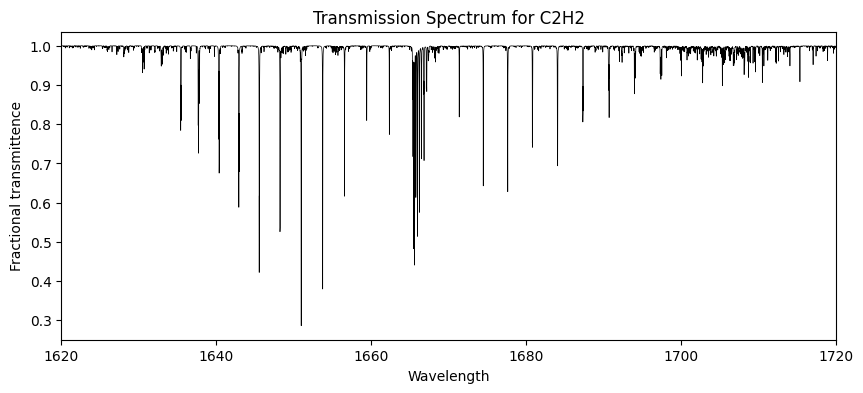

In [3]:
wavelength = data[:,0]*1e3

plt.figure(figsize=(10,4))
plt.plot(wavelength, data[:,1], color='black', linewidth=0.5)
plt.xlabel('Wavelength')
plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for C2H2')
plt.xlim((1620,1720))
plt.show()

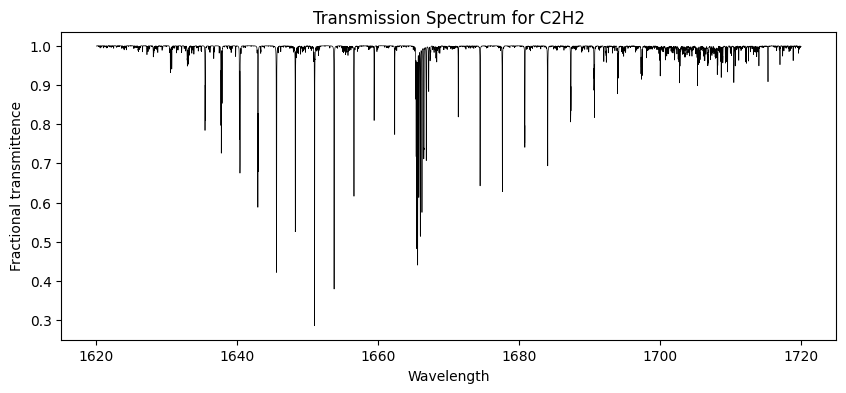

In [4]:
index_array =  np.where((wavelength>1620) & (wavelength<=1720))
index = index_array[0]

plt.figure(figsize=(10,4))
plt.plot(wavelength[index], data[index,1], color='black', linewidth=0.5)
plt.xlabel('Wavelength')
plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for C2H2')
plt.show()

Locate peaks with minimal distance between peaks to eliminate split peaks

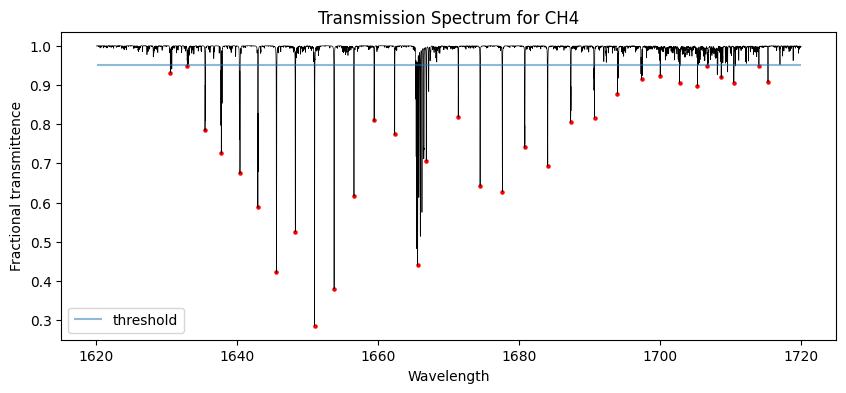

In [5]:
subset = data[index,:]

# convert wavelength into nm
subset[:,0] = subset[:,0] * 1e3

threshold_value = 0.95
peaks, properties = find_peaks(-subset[:, 1], height=-threshold_value, distance=100) # distance=100 correspond to 1nm

plt.figure(figsize=(10,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5)
plt.scatter(subset[peaks, 0], subset[peaks, 1], color='red', s=5)
plt.hlines(threshold_value, subset[:, 0].min(), subset[:, 0].max(), alpha=0.5, label='threshold')
plt.xlabel('Wavelength')
plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.legend()

# plt.xlim((1638,1642))

plt.show()